<a href="https://colab.research.google.com/github/walkerjian/DailyCode/blob/main/Code_Craft__findMin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Problem:
Given a node in a binary search tree, return the next bigger element, also known as the inorder successor.

For example, the inorder successor of 22 is 30.
```
   10
  /  \
 5    30
     /  \
   22    35
```
You can assume each node has a parent pointer.

##Solution:
To find the inorder successor of a given node in a binary search tree (BST), there are two main cases to consider:

1. **The node has a right subtree**: In this case, the inorder successor is the leftmost (minimum) node in its right subtree.
2. **The node does not have a right subtree**: In this case, we go up the BST using the parent pointers until we find a node which is the left child of its parent. This parent node is the inorder successor.

Here's a Python function to achieve this. The function assumes that each node in the BST has three properties: `value` (the node's value), `left` (the left child), `right` (the right child), and `parent` (the parent of the node).



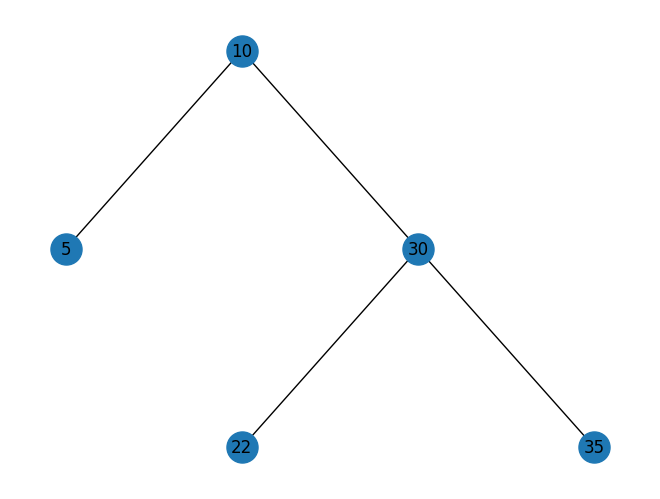

Inorder successor of node with value 22 is: 30
Inorder successor of node with value 5 is: 10


In [14]:
import matplotlib.pyplot as plt
import networkx as nx

class TreeNode:
    def __init__(self, value, left=None, right=None, parent=None):
        self.value = value
        self.left = left
        self.right = right
        self.parent = parent

def findMin(node):
    current = node
    while current.left is not None:
        current = current.left
    return current

def inorderSuccessor(node):
    if node is None:
        return None

    # Case 1: Node has right subtree
    if node.right:
        return findMin(node.right)

    # Case 2: Node has no right subtree
    p = node.parent
    while p is not None and node == p.right:
        node = p
        p = p.parent

    return p

def addNode(parent, child_value, is_left):
    if parent is None:
        return None

    child = TreeNode(child_value, parent=parent)
    if is_left:
        parent.left = child
    else:
        parent.right = child
    return child

def drawTree(root):
    if root is None:
        return

    def add_edges(node, G=None, pos=None, level=0, x=0):
        if G is None:
            G = nx.DiGraph()
        if pos is None:
            pos = {}

        pos[node.value] = (x, -level)
        if node.left:
            G.add_edge(node.value, node.left.value)
            add_edges(node.left, G, pos, level + 1, x - 1)
        if node.right:
            G.add_edge(node.value, node.right.value)
            add_edges(node.right, G, pos, level + 1, x + 1)

        return G, pos

    G, pos = add_edges(root)
    nx.draw(G, pos, with_labels=True, arrows=False, node_size=500)
    plt.show()

# Build the example tree
root = TreeNode(10)
n5 = addNode(root, 5, True)
n30 = addNode(root, 30, False)
n22 = addNode(n30, 22, True)
n35 = addNode(n30, 35, False)

# Draw the tree
drawTree(root)
successor = inorderSuccessor(n22)
if successor:
    print("Inorder successor of node with value", n22.value, "is:", successor.value)
else:
    print("The node with value", n22.value, "has no inorder successor.")
successor = inorderSuccessor(n5)
if successor:
    print("Inorder successor of node with value", n5.value, "is:", successor.value)
else:
    print("The node with value", n5.value, "has no inorder successor.")

This function first checks if the node has a right subtree. If it does, it finds the minimum in the right subtree. If not, it moves up the tree until it finds a node that is a left child of its parent. This node's parent is the inorder successor. If such a node is not found, it means the given node is the rightmost node in the tree, and its inorder successor does not exist (in which case the function returns `None`).